In [1]:
#things to be import

import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.autograd as atgd
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading training and testing data

batchsize = 16

transform = transforms.Compose(
    [
    transforms.Resize((32,32)),    
    transforms.ToTensor(),
    ])

train_dataset = torchvision.datasets.MNIST(root = './data/mnist', 
                           train = True, 
                           transform = transform,
                           download = True) 
test_dataset = torchvision.datasets.MNIST(root = './data/mnist',
                           train = False,
                           transform = transform,
                           download = True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

print("The number of training images: ", len(train_loader)*batchsize)
print("The number of testing images: ", len(test_loader)*batchsize)


print("Data load OK!")

The number of training images:  60000
The number of testing images:  10000
Data load OK!


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)     
        self.conv3 = nn.Conv2d(16, 10, 5)


    def forward(self, x):
        x = self.pool(func.relu(self.conv1(x)))
        x = self.pool(func.relu(self.conv2(x)))
        x = self.conv3(x)
    
        return x

net = Net()

net = net.cuda()
print(net)

H = 32
W = 128

H = H-net.conv1.kernel_size[0]+1
W = W - net.conv1.kernel_size[0]+1
print("after conv1: %d feature maps, each size %d * %d."
      % (net.conv1.out_channels,  H, W ) )
H /= 2 
W /= 2
print("after pool1: %d feature maps, each size %d * %d." 
      % (net.conv1.out_channels, H, W ) )

H = H-net.conv2.kernel_size[0]+1
W = W - net.conv2.kernel_size[0]+1
print("after conv2: %d feature maps, each size %d * %d."
      % (net.conv2.out_channels,  H, W ) )
H /= 2 
W /= 2
print("after pool2: %d feature maps, each size %d * %d." 
      % (net.conv2.out_channels, H, W ) )

H = H-net.conv3.kernel_size[0]+1
W = W - net.conv3.kernel_size[0]+1
print("after conv3: %d feature maps, each size %d * %d."
      % (net.conv3.out_channels,  H, W ) )


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 10, kernel_size=(5, 5), stride=(1, 1))
)
after conv1: 8 feature maps, each size 28 * 124.
after pool1: 8 feature maps, each size 14 * 62.
after conv2: 16 feature maps, each size 10 * 58.
after pool2: 16 feature maps, each size 5 * 29.
after conv3: 10 feature maps, each size 1 * 25.


In [4]:
#training process

epoch_num = 5
x1 = range(1,epoch_num+1)
x2 = range(1,epoch_num+1)
accuracy1 = []
accuracy2 = []
loss1 = []
loss2 = []


for epoch in range(epoch_num): 
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        
        optimizer.zero_grad()     
        outputs = net(inputs)
        outputs = outputs.view(-1,10)
        
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()


    print("epoch number %d" % (epoch + 1))
    
    correct = 0
    total = 0
    running_loss = 0
    for data in train_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        
    
        outputs = net(images)
        outputs = outputs.view(-1,10)
        
        
        train_loss = criterion(outputs, labels)
        running_loss += train_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('train_accuracy: %.3f %%' % (100 * correct / total))
    accuracy1.append(100 * correct / total)
    print("train_loss: %.3f" % (running_loss / (len(train_loader)*batchsize) ))
    loss1.append(running_loss / (len(train_loader)*batchsize))
    
    # testing accuracy and loss
    correct = 0
    total = 0
    running_loss = 0
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        outputs = outputs.view(-1,10)
        test_loss = criterion(outputs, labels)
        running_loss += test_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('test_accuracy: %.3f %%' % (100 * correct / total))
    accuracy2.append(100 * correct / total)
    print("test_loss: %.3f" % (running_loss / (len(test_loader)*batchsize) ))
    loss2.append(running_loss / (len(test_loader)*batchsize))

print("Training OK!")




epoch number 1
train_accuracy: 96.233 %
train_loss: 0.008
test_accuracy: 96.640 %
test_loss: 0.007
epoch number 2
train_accuracy: 97.415 %
train_loss: 0.005
test_accuracy: 97.640 %
test_loss: 0.005
epoch number 3
train_accuracy: 97.958 %
train_loss: 0.004
test_accuracy: 97.880 %
test_loss: 0.004
epoch number 4
train_accuracy: 98.065 %
train_loss: 0.004
test_accuracy: 98.040 %
test_loss: 0.004
epoch number 5
train_accuracy: 98.288 %
train_loss: 0.003
test_accuracy: 98.240 %
test_loss: 0.003
Training OK!


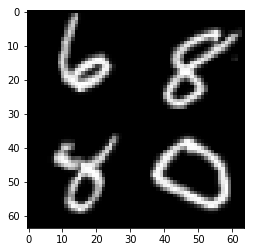

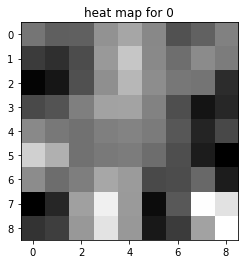

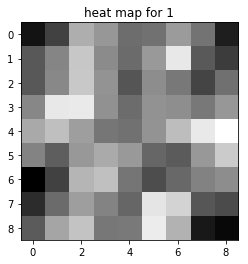

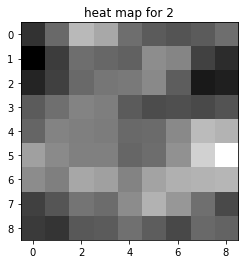

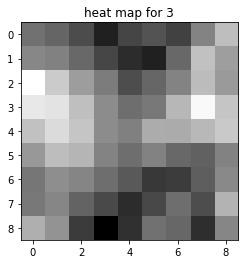

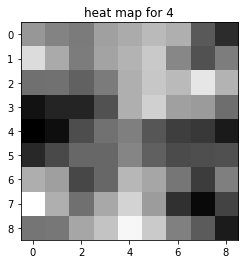

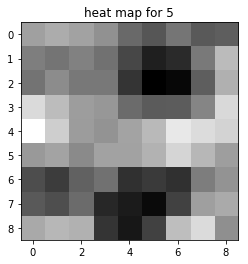

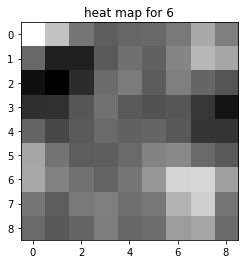

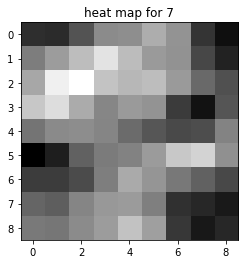

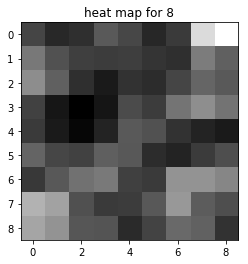

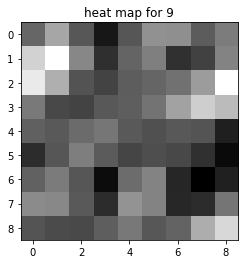

In [5]:
#64 * 64 input

combine_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

for data in combine_loader:
    images, _ = data
    images = images.cuda()

    combine = torch.cat((torch.cat((images[0], images[1]),1) , torch.cat((images[2], images[3]),1)),2)
    combine = combine.view(1,1,64,64)    
    
    plt.figure(0)
    plt.imshow(combine.squeeze(), cmap = "gray")
    
    
    outputs = net(combine)
    
    
    outputs = outputs.squeeze()
    
   
    for i in range(0,10):
        plt.figure(i+1)
        plt.title("heat map for %d" % i)
        plt.imshow(outputs[i].detach(), cmap="gray")
    break


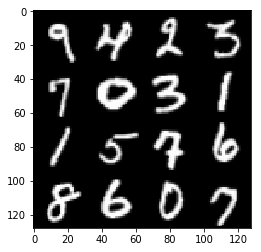

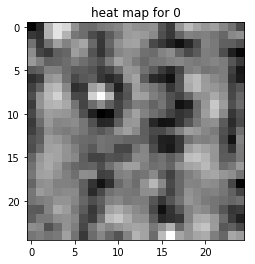

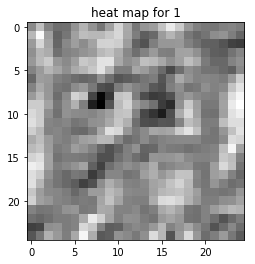

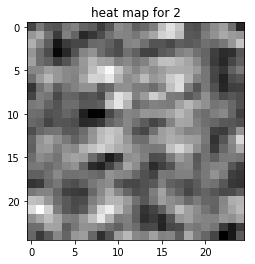

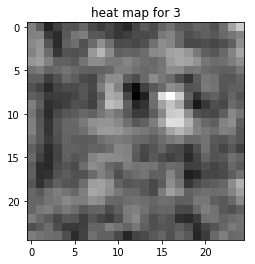

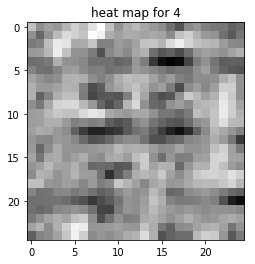

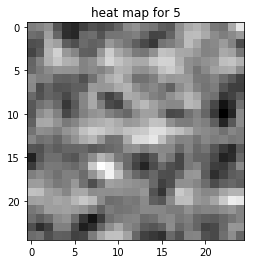

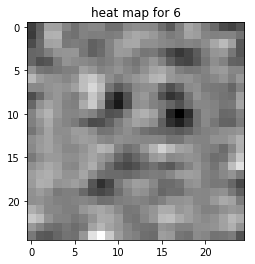

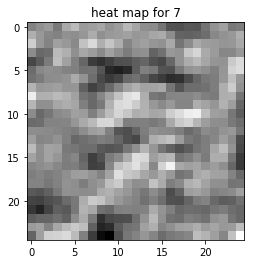

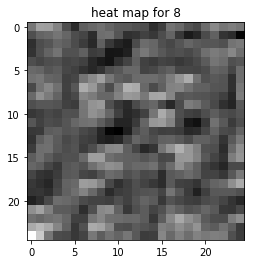

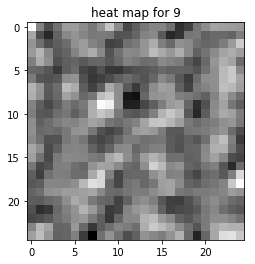

In [7]:
#128 * 128 input
combine_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                          shuffle=True, num_workers=2)

for data in combine_loader:
    images, _ = data
    images = images.cuda()


    line = []
    for i in range(4):
        line.append(torch.cat((images[i*4], images[i*4+1],images[i*4+2],images[i*4+3]),1))

    
    combine = torch.cat((line[0], line[1],line[2], line[3]),2)
    combine = combine.view(1,1,128,128)    
#     print(combine.size())
    plt.figure(0)
    plt.imshow(combine.squeeze(), cmap = "gray")
    
    
    outputs = net(combine)
#     print(outputs.size())
    
    outputs = outputs.squeeze()
    
#     print(outputs.size())
    for i in range(0,10):
        plt.figure(i+1)
        plt.title("heat map for %d" % i)
        plt.imshow(outputs[i].detach(), cmap="gray")
    break


torch.Size([1, 10, 1, 25])
torch.Size([10, 1, 25])


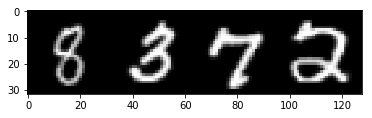

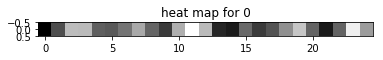

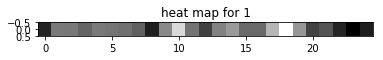

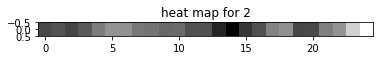

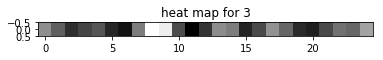

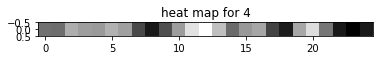

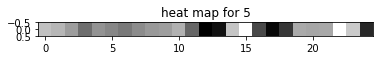

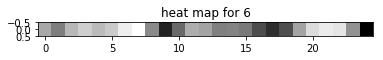

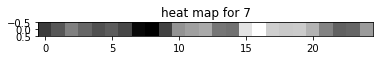

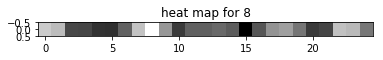

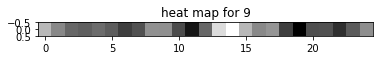

In [17]:
#32 * 128 input
combine_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

for data in combine_loader:
    images, _ = data
    images = images.cuda()

    combine = torch.cat((images[0],images[1],images[2], images[3]),2)
    combine = combine.view(1,1,32,128)    
#     print(combine.size())
    plt.figure(0)
    plt.imshow(combine.squeeze(), cmap = "gray")
    
    
    outputs = net(combine)
    print(outputs.size())
    
    outputs = outputs.squeeze(0)
    
    print(outputs.size())
    for i in range(0,10):
        plt.figure(i+1)
        plt.title("heat map for %d" % i)
        plt.imshow(outputs[i].detach(), cmap="gray")
    break